In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Load the data

In [11]:
# Load the data
df = pd.read_csv('Country-data.csv')

# Show the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Show columns and their types
print(df.info())


| country             | child_mort   | exports   | health   | imports   | income   | inflation   | life_expec   | total_fer   | gdpp   |
|:--------------------|:-------------|:----------|:---------|:----------|:---------|:------------|:-------------|:------------|:-------|
| Afghanistan         | 90.2         | 10        | 7.58     | 44.9      | 1610     | 9.44        | 56.2         | 5.82        | 553    |
| Albania             | 16.6         | 28        | 6.55     | 48.6      | 9930     | 4.49        | 76.3         | 1.65        | 4090   |
| Algeria             | 27.3         | 38.4      | 4.17     | 31.4      | 12900    | 16.1        | 76.5         | 2.89        | 4460   |
| Angola              | 119          | 62.3      | 2.85     | 42.9      | 5900     | 22.4        | 60.1         | 6.16        | 3530   |
| Antigua and Barbuda | 10.3         | 45.5      | 6.03     | 58.9      | 19100    | 1.44        | 76.8         | 2.13        | 12200  |
<class 'pandas.core.frame.DataFrame'>
Ran

Feature Selection

In [12]:
# Filter the dataframe to the columns `child_mort`, `income`, `life_expec`, and `gdpp`
filtered_df = df[['child_mort', 'income', 'life_expec', 'gdpp']]

In [13]:
# Convert to numpy array
array = filtered_df.values

In [14]:
# Check for and handle NaN values 
if np.isnan(array).any():
    array = array[~np.isnan(array).any(axis=1)]

In [15]:
# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(array)
    wcss.append(kmeans.inertia_)

c:\Users\AezersX\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AezersX\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AezersX\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AezersX\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

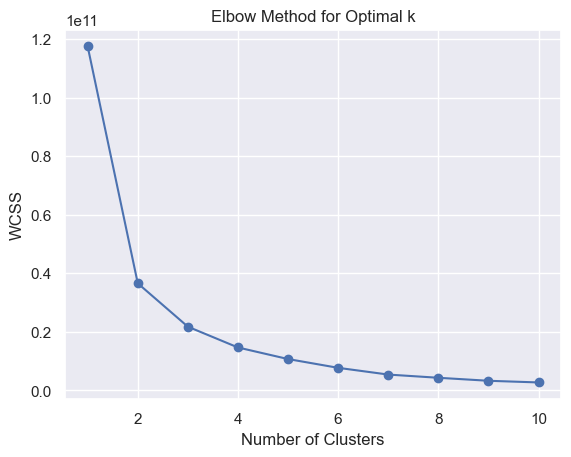


Cluster Means:
| Cluster   | child_mort   | income   | life_expec   | gdpp    |
|:----------|:-------------|:---------|:-------------|:--------|
| 0         | 54.1352      | 6381.14  | 66.5667      | 3027.26 |
| 1         | 5.04286      | 47571.4  | 80.4571      | 46085.7 |
| 2         | 12.1029      | 25600    | 76.0629      | 17347.7 |
| 3         | 5            | 93000    | 80.6         | 87700   |


c:\Users\AezersX\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
# Create a line plot with the number of clusters on the x-axis and the WCSS values on the y-axis
plt.plot(range(1, 11), wcss, marker='o')

# Add labels to the x-axis and y-axis
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Add a title to the plot
plt.title('Elbow Method for Optimal k')

# Show the plot
plt.show()

# Fit the K-means model with the optimal number of clusters (you might need to adjust based on the Elbow method plot)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(array)

# Add the cluster labels to the original DataFrame
df['Cluster'] = y_kmeans

# Analyze the clusters (example: calculate means for each cluster)
print("\nCluster Means:")
print(df.groupby('Cluster')[['child_mort', 'income', 'life_expec', 'gdpp']].mean().to_markdown(numalign="left", stralign="left"))

Given that we have 4 features (gdpp, income, child_mort, and life_expec) and 4 clusters, we will create scatter plots for each pair of features, with the points colored according to their cluster assignments

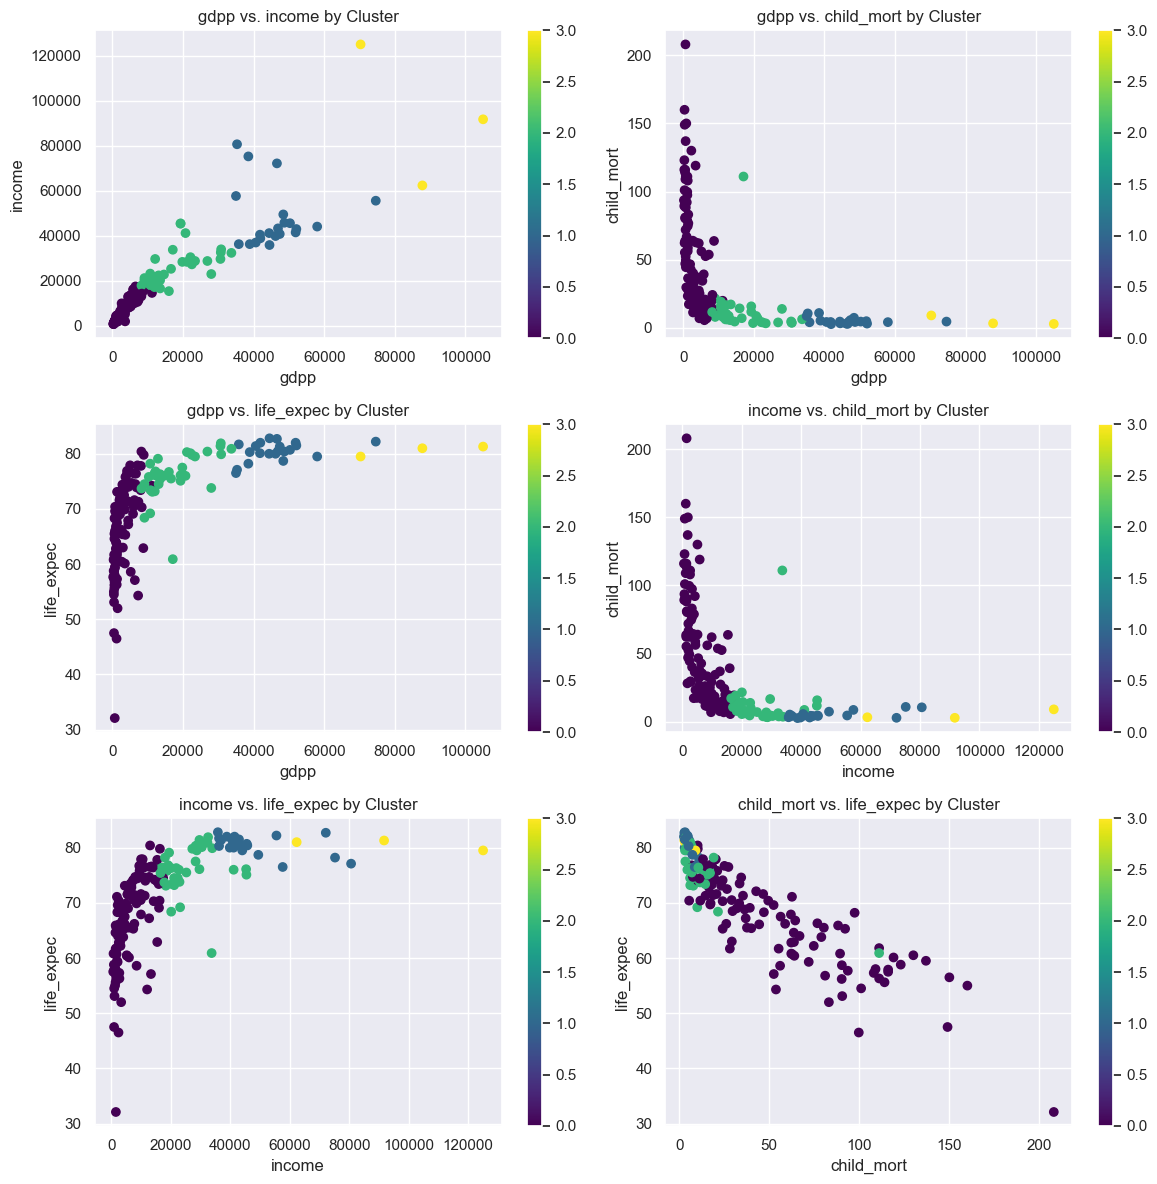

In [21]:
import matplotlib.pyplot as plt
from itertools import combinations

# Create a figure and a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Define the features to use for plotting
features = ['gdpp', 'income', 'child_mort', 'life_expec']

# Iterate through unique pairs of features
for i, (feature_x, feature_y) in enumerate(combinations(features, 2)):
    # Create a scatter plot on the corresponding subplot
    scatter = axes[i].scatter(df[feature_x], df[feature_y], c=df['Cluster'], cmap='viridis')

    # Add labels and title
    axes[i].set_xlabel(feature_x)
    axes[i].set_ylabel(feature_y)
    axes[i].set_title(f'{feature_x} vs. {feature_y} by Cluster')

    # Add colorbar
    plt.colorbar(scatter, ax=axes[i])

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Show all plots
plt.show()